<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

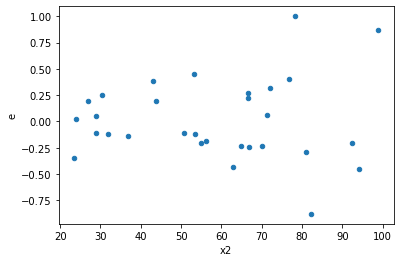

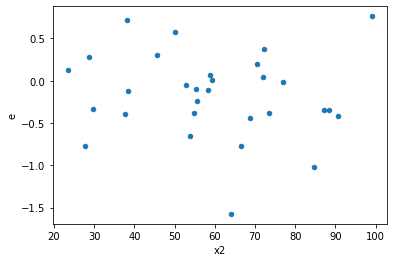

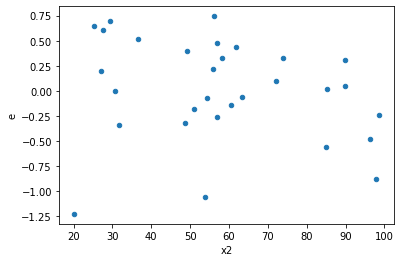

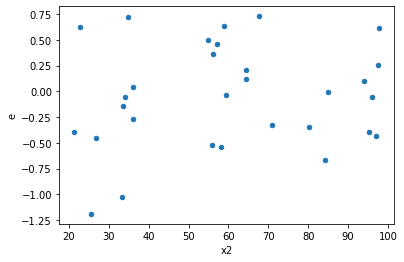

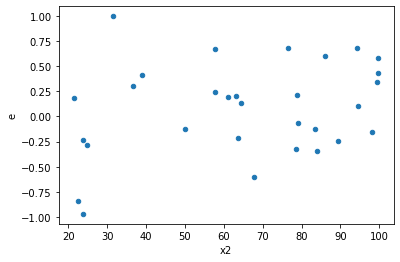

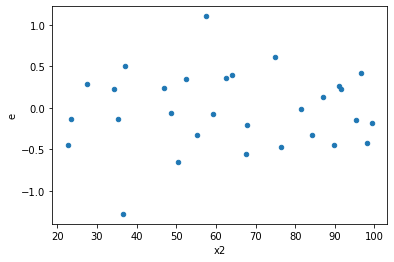

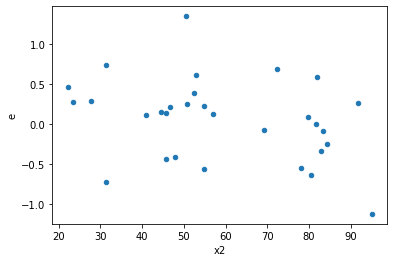

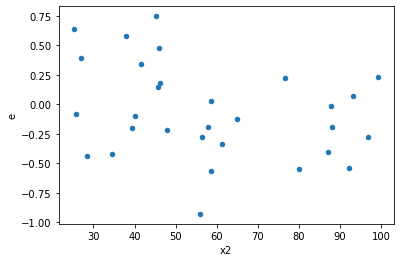

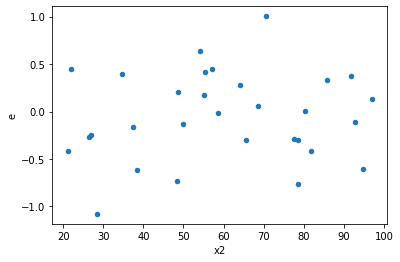

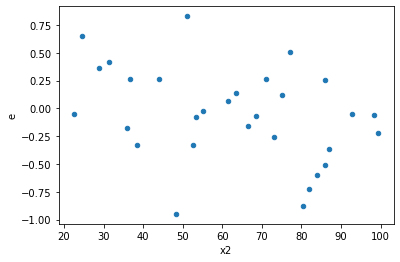

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,14.0,1.2680222859620396,1.9613325746024208,0.10566852383016996,0.14009518390017292,1.3257986278424154,0.6082128217063856,0.6958935891468072,0.3041064108531928,Reject001=1 : Homoscedasticity
1.0,14.0,12.0,1.8911977998256297,3.4343258605392375,0.13508555713040213,0.2861938217116031,2.1186115510137893,0.1996268564047985,0.9001865717976008,0.09981342820239925,Reject001=1 : Homoscedasticity
2.0,15.0,11.0,1.1959974533556588,5.4481928256735745,0.07973316355704392,0.49529025687941586,6.2118475523057315,0.004145495048511805,0.9979272524757441,0.0020727475242559024,Reject001=0 : Heteroscedasticity
3.0,13.0,13.0,2.2294978634031994,4.265985236158221,0.17149983564639995,0.3281527104737093,1.9134287169248243,0.25515562212540654,0.8724221889372967,0.12757781106270327,Reject001=1 : Homoscedasticity
4.0,17.0,9.0,2.244790593347579,2.3395303642745326,0.13204650549103406,0.25994781825272584,1.9686080845992269,0.30198839358832763,0.8490058032058362,0.15099419679416382,Reject001=1 : Homoscedasticity
5.0,11.0,15.0,1.1657313353663885,4.547931541388773,0.10597557594239895,0.30319543609258487,2.8609935204068258,0.06095722729220521,0.9695213863538974,0.030478613646102604,Reject001=1 : Homoscedasticity
6.0,10.0,16.0,2.360020909000052,4.072724022071651,0.2360020909000052,0.2545452513794782,1.0785720177679687,0.8612547243323911,0.5693726378338044,0.43062736216619557,Reject001=1 : Homoscedasticity
7.0,17.0,9.0,2.1679440989981233,1.94056158199182,0.12752612347047784,0.21561795355464666,1.6907747815651433,0.4262725596576673,0.7868637201711663,0.21313627982883365,Reject001=1 : Homoscedasticity
9.0,14.0,12.0,1.8538262233298004,2.2432416620348343,0.13241615880927146,0.18693680516956954,1.4117371086018897,0.555545711768803,0.7222271441155985,0.2777728558844015,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,14.0,1.2680222859620396,1.9613325746024208,0.10566852383016996,0.14009518390017292,1.3257986278424154,0.6082128217063856,Reject001=1 : Homoscedasticity
1.0,14.0,12.0,1.8911977998256297,3.4343258605392375,0.13508555713040213,0.2861938217116031,2.1186115510137893,0.1996268564047985,Reject001=1 : Homoscedasticity
2.0,15.0,11.0,1.1959974533556588,5.4481928256735745,0.07973316355704392,0.49529025687941586,6.2118475523057315,0.004145495048511805,Reject001=0 : Heteroscedasticity
3.0,13.0,13.0,2.2294978634031994,4.265985236158221,0.17149983564639995,0.3281527104737093,1.9134287169248243,0.25515562212540654,Reject001=1 : Homoscedasticity
4.0,17.0,9.0,2.244790593347579,2.3395303642745326,0.13204650549103406,0.25994781825272584,1.9686080845992269,0.30198839358832763,Reject001=1 : Homoscedasticity
5.0,11.0,15.0,1.1657313353663885,4.547931541388773,0.10597557594239895,0.30319543609258487,2.8609935204068258,0.06095722729220521,Reject001=1 : Homoscedasticity
6.0,10.0,16.0,2.360020909000052,4.072724022071651,0.2360020909000052,0.2545452513794782,1.0785720177679687,0.8612547243323911,Reject001=1 : Homoscedasticity
7.0,17.0,9.0,2.1679440989981233,1.94056158199182,0.12752612347047784,0.21561795355464666,1.6907747815651433,0.4262725596576673,Reject001=1 : Homoscedasticity
8.0,21.0,5.0,4.929170389458106,1.1850102749386735,0.23472239949800505,0.2370020549877347,1.0097121343962276,0.8943126134223769,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      970
Reject001=0 : Heteroscedasticity     30
Name: Result_test, dtype: int64